### Table of Contents
01. Import Libraries
02. Import Data
03. Explore Data
04. Task 4.10 (Step 2): Address PII Data
05. Task 4.10 (Step 3): Create Regional Segmentation of Data
06. Task 4.10 (Step 4): Create Exclusion Flag for Low-activity Customers
07. Task 4.10 (Step 5): Create Profiling Variable
    01. Create Child Status Variable
    02. Create Department Group Variable
    03. Create Profiling Variable based on age, income, and number of dependants
08. Task 4.10 (Step 6): Create Bar Chart to Show Profile Distribution
09. Task 4.10 (Step 7): Aggregate Max, Min, Mean for Usage Frequency and Expenditure on Customer-Profile Level
10. Task 4.10: (Step 8): Identify Link Between Profile and Regions/Departments
11. Task 4.10 (Step 9): Additional Groupings and Visualizations
12. Export Dataframe and Visualizations

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [2]:
# Folder Path
path = r'C:\Users\jrper\OneDrive\Documents\Career Foundry Data Analytics Program\Instacart Basket Analysis'

In [3]:
# Import orders_products_merged.pkl
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

# 03. Explore Data

In [4]:
# Check first 5 rows for df_ords_prods_cust
df_ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,STATE,Age,date_joined,number_of_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
# List columns for df_ords_prods_cust
df_ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days_2',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'user_prices_mean', 'spending_flag', 'days_since_prior_order_median',
       'frequency_flag', 'First Name', 'Last Name', 'Gender', 'STATE', 'Age',
       'date_joined', 'number_of_dependants', 'fam_status', 'income',
       '_merge'],
      dtype='object')

In [6]:
# Check size for df_ords_prods_cust
df_ords_prods_cust.shape

(32404859, 32)

#### Observations: Output is as expected.

# 04. Task 4.10 (Step 2): Address PII Data

In [7]:
# Create dataframe without 'First Name' and 'Last Name' columns for data privacy
df_ords_prods_cust = df_ords_prods_cust.drop(columns = ['First Name', 'Last Name'])

In [8]:
# Ensure column drop was successful
df_ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days_2',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'user_prices_mean', 'spending_flag', 'days_since_prior_order_median',
       'frequency_flag', 'Gender', 'STATE', 'Age', 'date_joined',
       'number_of_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

#### Observations: Column drop was successful.

# 05. Task 4.10 (Step 3): Create Regional Segmentation of Data

In [9]:
# View 'STATE' column frequency
df_ords_prods_cust['STATE'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [10]:
# Create list of states for each region
Region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [11]:
Region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [12]:
Region_3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky','Tennessee', 'Mississippi', 'Alabama', 'Oklahoma','Texas', 'Arkansas', 'Louisiana']

In [13]:
Region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [14]:
# Create 'region' variable using region lists 
df_ords_prods_cust.loc[df_ords_prods_cust['STATE'].isin(Region_1), 'region'] = 'Northeast'

In [15]:
df_ords_prods_cust.loc[df_ords_prods_cust['STATE'].isin(Region_2), 'region'] = 'Midwest'

In [16]:
df_ords_prods_cust.loc[df_ords_prods_cust['STATE'].isin(Region_3), 'region'] = 'South'

In [17]:
df_ords_prods_cust.loc[df_ords_prods_cust['STATE'].isin(Region_4), 'region'] = 'West'

In [18]:
# View frequency for new 'region' column
df_ords_prods_cust['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [19]:
# View size of new 'region' column
df_ords_prods_cust['region'].shape

(32404859,)

#### Observations: New 'region' column created successfully, and counts are as expected.

In [20]:
# Create crosstab for 'region' and 'spending_flag' columns to compare spending habits between regions
crosstab = pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['spending_flag'], dropna = False)

In [21]:
# View crosstab
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


#### Observations: The South has the largest number of high and low spenders, but it is also the region with the largest number of states.

# 06. Task 4.10 (Step 4): Create Exclusion Flag for Low-activity Customers

In [22]:
# Create exclusion flag for low-activity customers
df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] >= 5, 'exclusion_flag'] = 'High_Activity'

In [23]:
df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] < 5, 'exclusion_flag'] = 'Low_Activity'

In [24]:
# Ensure 'exclusion_flag' was successfully created
df_ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,number_of_dependants,fam_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High_Activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High_Activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High_Activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High_Activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High_Activity


In [25]:
# View 'exclusion_flag' frequency in df_ords_prods_cust
df_ords_prods_cust['exclusion_flag'].value_counts(dropna = False)

High_Activity    30964564
Low_Activity      1440295
Name: exclusion_flag, dtype: int64

#### Observations: 'exclusion_flag' was successfully created

In [26]:
# Create subset without 'Low_Activity' customers
df_high_activity = df_ords_prods_cust[df_ords_prods_cust['exclusion_flag'] == 'High_Activity']

In [27]:
# View df_high_activity
df_high_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,number_of_dependants,fam_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High_Activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High_Activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High_Activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High_Activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High_Activity


In [28]:
# View 'exclusion_flag' frequency in df_high_activity
df_high_activity['exclusion_flag'].value_counts(dropna = False)

High_Activity    30964564
Name: exclusion_flag, dtype: int64

#### Observations: Subset excluding 'Low_Activity' customers successfully created.

# 07. Task 4.10 (Step 5): Create Profiling Variable

### Create Age Group Variable

In [29]:
# View 'Age' statistics
df_high_activity['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [30]:
# Create 'age-group' variable
df_high_activity.loc[(df_high_activity['Age'] >= 18) & (df_high_activity['Age'] <= 35), 'age_group'] = 'Young_Adult'

C:\Users\jrper\AppData\Local\Temp\ipykernel_3532\1209536922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['Age'] >= 18) & (df_high_activity['Age'] <= 35), 'age_group'] = 'Young_Adult'


In [31]:
df_high_activity.loc[(df_high_activity['Age'] >= 36) & (df_high_activity['Age'] <= 55), 'age_group'] = 'Middle_Age_Adult'

In [32]:
df_high_activity.loc[(df_high_activity['Age'] > 55), 'age_group'] = 'Older_Adult'

In [33]:
# View frequency for new 'age_group' variable
df_high_activity['age_group'].value_counts(dropna = False)

Older_Adult         12508298
Middle_Age_Adult     9717461
Young_Adult          8738805
Name: age_group, dtype: int64

#### Observations: Output is as expected.

### Create Income Range Variable

In [34]:
# View 'income' statistics
df_high_activity['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [35]:
# Create 'income_range' variable
df_high_activity.loc[(df_high_activity['income'] < 50000), 'income_range'] = 'Low_Income'

C:\Users\jrper\AppData\Local\Temp\ipykernel_3532\1780369873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['income'] < 50000), 'income_range'] = 'Low_Income'


In [36]:
df_high_activity.loc[(df_high_activity['income'] >= 50000) & (df_high_activity['income'] <= 150000), 'income_range'] = 'Mid_Income'

In [37]:
df_high_activity.loc[(df_high_activity['income'] > 150000), 'income_range'] = 'High_Income'

In [38]:
# View frequency for new 'income-range' variable
df_high_activity['income_range'].value_counts(dropna = False)

Mid_Income     23707476
High_Income     3894534
Low_Income      3362554
Name: income_range, dtype: int64

#### Observations: Output is as expected.

### Create Child Status Variable

In [39]:
# View 'number_of_dependants' frequency
df_high_activity['number_of_dependants'].value_counts(dropna = False)

3    7772516
0    7739681
2    7733261
1    7719106
Name: number_of_dependants, dtype: int64

In [40]:
# Create 'child_status' variable
df_high_activity.loc[(df_high_activity['number_of_dependants'] == 0), 'child_status'] = 'No'

C:\Users\jrper\AppData\Local\Temp\ipykernel_3532\1486087771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['number_of_dependants'] == 0), 'child_status'] = 'No'


In [41]:
df_high_activity.loc[(df_high_activity['number_of_dependants'] > 0), 'child_status'] = 'Yes'

In [42]:
# View frequency for 'child_status' variable
df_high_activity['child_status'].value_counts(dropna = False)

Yes    23224883
No      7739681
Name: child_status, dtype: int64

#### Observations: Output is as expected.

### Create Department Group Variable

In [43]:
# Check frequency for 'department_id'
df_high_activity['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [44]:
# Check datatype for 'department_id'
df_high_activity['department_id'].dtype

dtype('int64')

In [45]:
# Create lists for 'department_id' groups
Foods = [1, 3, 4, 6, 7, 9, 10, 12, 13, 14, 15, 16, 19, 20]

In [46]:
Non_Foods = [8, 11, 17, 18]

In [47]:
Alcohol = [5]

In [48]:
Other = [2, 21]

In [49]:
# Create 'department_groups' variable
df_high_activity.loc[df_high_activity['department_id'].isin(Foods), 'department_groups'] = 'Foods'

C:\Users\jrper\AppData\Local\Temp\ipykernel_3532\625755949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[df_high_activity['department_id'].isin(Foods), 'department_groups'] = 'Foods'


In [50]:
df_high_activity.loc[df_high_activity['department_id'].isin(Non_Foods), 'department_groups'] = 'Non_Foods'

In [51]:
df_high_activity.loc[df_high_activity['department_id'].isin(Alcohol), 'department_groups'] = 'Alcohol'

In [52]:
df_high_activity.loc[df_high_activity['department_id'].isin(Other), 'department_groups'] = 'Other'

In [53]:
# Check frequency for 'department_groups'
df_high_activity['department_groups'].value_counts(dropna = False)

Foods        29093143
Non_Foods     1627615
Alcohol        144627
Other           99179
Name: department_groups, dtype: int64

### Create Profiling Variable based on age, income, and number of dependants

In [54]:
# Create 'profile' variable
df_high_activity.loc[(df_high_activity['age_group'] == 'Young_Adult') & (df_high_activity['income_range'] == 'Low_Income') & (df_high_activity['child_status'] == 'Yes'), 'profile'] = 'YA_LI_C'

C:\Users\jrper\AppData\Local\Temp\ipykernel_3532\1923892367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity.loc[(df_high_activity['age_group'] == 'Young_Adult') & (df_high_activity['income_range'] == 'Low_Income') & (df_high_activity['child_status'] == 'Yes'), 'profile'] = 'YA_LI_C'


In [55]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Young_Adult') & (df_high_activity['income_range'] == 'Low_Income') & (df_high_activity['child_status'] == 'No'), 'profile'] = 'YA_LI_NC'

In [56]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Young_Adult') & (df_high_activity['income_range'] == 'Mid_Income') & (df_high_activity['child_status'] == 'Yes'), 'profile'] = 'YA_MI_C'

In [57]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Young_Adult') & (df_high_activity['income_range'] == 'Mid_Income') & (df_high_activity['child_status'] == 'No'), 'profile'] = 'YA_MI_NC'

In [58]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Young_Adult') & (df_high_activity['income_range'] == 'High_Income') & (df_high_activity['child_status'] == 'Yes'), 'profile'] = 'YA_HI_C'

In [59]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Young_Adult') & (df_high_activity['income_range'] == 'High_Income') & (df_high_activity['child_status'] == 'No'), 'profile'] = 'YA_HI_NC'

In [60]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Middle_Age_Adult') & (df_high_activity['income_range'] == 'Low_Income') & (df_high_activity['child_status'] == 'Yes'), 'profile'] = 'MA_LI_C'

In [61]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Middle_Age_Adult') & (df_high_activity['income_range'] == 'Low_Income') & (df_high_activity['child_status'] == 'No'), 'profile'] = 'MA_LI_NC'

In [62]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Middle_Age_Adult') & (df_high_activity['income_range'] == 'Mid_Income') & (df_high_activity['child_status'] == 'Yes'), 'profile'] = 'MA_MI_C'

In [63]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Middle_Age_Adult') & (df_high_activity['income_range'] == 'Mid_Income') & (df_high_activity['child_status'] == 'No'), 'profile'] = 'MA_MI_NC'

In [64]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Middle_Age_Adult') & (df_high_activity['income_range'] == 'High_Income') & (df_high_activity['child_status'] == 'Yes'), 'profile'] = 'MA_HI_C'

In [65]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Middle_Age_Adult') & (df_high_activity['income_range'] == 'High_Income') & (df_high_activity['child_status'] == 'No'), 'profile'] = 'MA_HI_NC'

In [66]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Older_Adult') & (df_high_activity['income_range'] == 'Low_Income') & (df_high_activity['child_status'] == 'Yes'), 'profile'] = 'OA_LI_C'

In [67]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Older_Adult') & (df_high_activity['income_range'] == 'Low_Income') & (df_high_activity['child_status'] == 'No'), 'profile'] = 'OA_LI_NC'

In [68]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Older_Adult') & (df_high_activity['income_range'] == 'Mid_Income') & (df_high_activity['child_status'] == 'Yes'), 'profile'] = 'OA_MI_C'

In [69]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Older_Adult') & (df_high_activity['income_range'] == 'Mid_Income') & (df_high_activity['child_status'] == 'No'), 'profile'] = 'OA_MI_NC'

In [70]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Older_Adult') & (df_high_activity['income_range'] == 'High_Income') & (df_high_activity['child_status'] == 'Yes'), 'profile'] = 'OA_HI_C'

In [71]:
df_high_activity.loc[(df_high_activity['age_group'] == 'Older_Adult') & (df_high_activity['income_range'] == 'High_Income') & (df_high_activity['child_status'] == 'No'), 'profile'] = 'OA_HI_NC'

In [72]:
# Check frequency for new 'profile' variable
df_high_activity['profile'].value_counts(dropna = False)

OA_MI_C     6827744
MA_MI_C     5492999
YA_MI_C     5490445
OA_MI_NC    2281440
MA_MI_NC    1812716
YA_MI_NC    1802132
OA_HI_C     1769730
MA_HI_C     1066765
YA_LI_C     1009104
OA_LI_C      765575
MA_LI_C      740955
OA_HI_NC     611989
MA_HI_NC     364079
YA_LI_NC     355153
OA_LI_NC     251820
MA_LI_NC     239947
YA_HI_C       61566
YA_HI_NC      20405
Name: profile, dtype: int64

In [73]:
# Check dataframe output
df_high_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,_merge,region,exclusion_flag,age_group,income_range,child_status,department_groups,profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,both,South,High_Activity,Young_Adult,Low_Income,Yes,Foods,YA_LI_C
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,both,South,High_Activity,Young_Adult,Low_Income,Yes,Foods,YA_LI_C
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,both,South,High_Activity,Young_Adult,Low_Income,Yes,Foods,YA_LI_C
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,both,South,High_Activity,Young_Adult,Low_Income,Yes,Foods,YA_LI_C
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,both,South,High_Activity,Young_Adult,Low_Income,Yes,Foods,YA_LI_C


#### Observations: Output is as expected. Value counts add up to 30,964,564. 

# 08. Task 4.10 (Step 6): Create Bar Chart to Show Profile Distribution

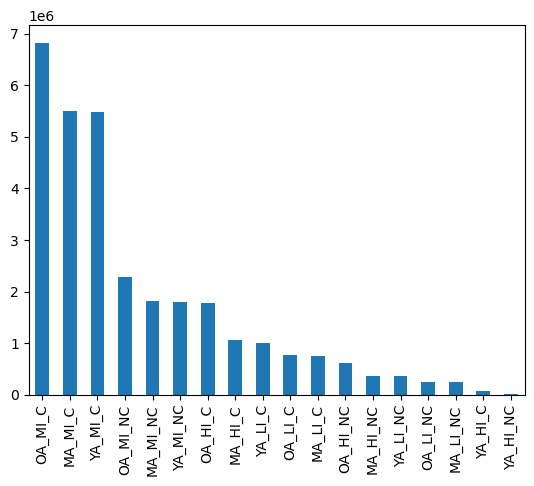

In [74]:
# Create bar chart for 'profile' variable
hist_bar = df_high_activity['profile'].value_counts().plot.bar()

### Profile Abbreviations:
### YA: Young Adult (18-35)
### MA: Middle Age Adult (36-55)
### OA: Older Adult (55+)

### LI: Low Income (<50,000)
### MI: Mid Income (50,000-150,000)
### HI: High Income (150,000 +)

### C: Children
### NC: No Children

# 09. Task 4.10 (Step 7): Aggregate Max, Min, Mean for Usage Frequency and Expenditure on Customer-Profile Level

In [75]:
# Aggregate max, min, mean for 'order_number', 'days_since_prior_order', and 'prices' variables grouped by 'profile' variable
df_high_activity.groupby('profile').agg({'order_number': ['mean', 'min', 'max'], 'days_since_prior_order' : ['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_number         days_since_prior_order               prices  \
                 mean min max                   mean  min   max      mean   
profile                                                                     
MA_HI_C     17.968315   1  99              10.707262  0.0  30.0  7.938538   
MA_HI_NC    18.401995   1  99              10.523352  0.0  30.0  7.934507   
MA_LI_C     16.899787   1  99              11.188045  0.0  30.0  6.637145   
MA_LI_NC    16.815688   1  99              11.216042  0.0  30.0  6.597905   
MA_MI_C     17.950856   1  99              10.760579  0.0  30.0  7.916403   
MA_MI_NC    17.881770   1  99              10.820841  0.0  30.0  7.913241   
OA_HI_C     17.872965   1  99              10.736970  0.0  30.0  7.945533   
OA_HI_NC    18.432808   1  99              10.630443  0.0  30.0  7.927132   
OA_LI_C     16.803711   1  99              11.140245  0.0  30.0  6.504095   
OA_LI_NC    17.251394   1  99              11.056734  0.0  30.0  6.525450   
OA_MI_C     17.798991   1  99              10.832758  0.0  30.0  7.899551   
OA_MI_NC    18.231229   1  99              10.680431  0.0  30.0  7.902994   
YA_HI_C     19.874054   1  99              10.453990  0.0  30.0  7.785699   
YA_HI_NC    19.794021   1  94              10.111481  0.0  30.0  7.682542   
YA_LI_C     16.463962   1  99              11.247218  0.0  30.0  6.906021   
YA_LI_NC    17.544205   1  99              11.081450  0.0  30.0  6.930367   
YA_MI_C     18.046742   1  99              10.729374  0.0  30.0  7.946150   
YA_MI_NC    17.749097   1  99              10.871327  0.0  30.0  7.948124   

                     
          min   max  
profile              
MA_HI_C   1.0  25.0  
MA_HI_NC  1.0  25.0  
MA_LI_C   1.0  25.0  
MA_LI_NC  1.0  25.0  
MA_MI_C   1.0  25.0  
MA_MI_NC  1.0  25.0  
OA_HI_C   1.0  25.0  
OA_HI_NC  1.0  25.0  
OA_LI_C   1.0  25.0  
OA_LI_NC  1.0  25.0  
OA_MI_C   1.0  25.0  
OA_MI_NC  1.0  25.0  
YA_HI_C   1.0  25.0  
YA_HI_NC  1.0  25.0  
YA_LI_C   1.0  25.0  
YA_LI_NC  1.0  25.0  
YA_MI_C   1.0  25.0  
YA_MI_NC  1.0  25.0

#### Observations: 'order_number' average among profile groups ranges from 16-19. 'days_since_prior_order' mean shows that customers order every 10-11 days. 'prices' mean shows that average product price ordered is between 6.50 and 8.00.

# 10. Task 4.10: (Step 8): Identify Link Between Profile and Regions/Departments

In [76]:
# Create crosstab between 'profile' and 'region' variables
crosstab_profile_regions = pd.crosstab(df_high_activity['profile'], df_high_activity['region'], dropna = False)

In [77]:
# View 'profile' by 'region' crosstab
crosstab_profile_regions

region,Midwest,Northeast,South,West
profile,,,,
MA_HI_C,256482,191331,334810,284142
MA_HI_NC,89175,58557,116601,99746
MA_LI_C,172299,127936,248836,191884
MA_LI_NC,55258,42604,85691,56394
MA_MI_C,1306310,963990,1828614,1394085
MA_MI_NC,449298,294904,597711,470803
OA_HI_C,418537,305124,600385,445684
OA_HI_NC,133615,110372,207592,160410
OA_LI_C,171046,140221,258201,196107


In [78]:
# Create crosstab between 'profile' and 'department_id' variables
crosstab_profile_department = pd.crosstab(df_high_activity['profile'], df_high_activity['department_id'], dropna = False)

In [79]:
# View 'profile' by 'department_id' crosstab
crosstab_profile_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
MA_HI_C,74864,1163,40373,314192,5637,9095,85476,3329,29317,954,...,25704,62944,22853,36582,181069,24875,14018,83451,34299,2225
MA_HI_NC,25279,421,13825,106494,2380,3076,28673,1715,9879,411,...,8294,21962,7675,12391,61394,8566,6094,28339,11650,765
MA_LI_C,46339,868,24493,184413,4019,4544,84061,1819,14019,1073,...,6934,36014,20220,16929,108540,19126,6348,126690,23059,1500
MA_LI_NC,14562,324,6815,60269,1422,1506,27416,389,4296,298,...,2200,11644,6634,5485,35708,5662,1612,42230,7620,509
MA_MI_C,378074,5975,198802,1642372,22909,47101,435597,15871,151456,5845,...,125736,321506,115273,184829,929551,123446,80376,441410,177823,11563
MA_MI_NC,124679,2024,67174,545062,8536,15631,146687,5374,48932,1792,...,41122,104177,38032,60764,305233,38477,25588,145590,59362,3839
OA_HI_C,125564,2118,67818,515431,10460,14736,142778,5617,48398,1740,...,42344,105121,38222,60266,297938,41470,24136,139022,58137,3919
OA_HI_NC,43743,648,22367,182137,3198,5225,48951,1914,16316,555,...,13170,36652,12674,20040,104434,14021,8255,48221,19719,1213
OA_LI_C,48445,852,23261,183768,4352,4467,94376,1787,13393,1223,...,6186,37063,22035,16510,109335,20833,5753,136070,23551,1377


In [80]:
# Copy to clipboard to visualize in Excel
crosstab_profile_regions.to_clipboard()

In [81]:
# Copy to clipboard to visualize in Excel
crosstab_profile_department.to_clipboard()

# 11. Task 4.10 (Step 9): Additional Groupings and Visualizations

In [82]:
# Group 'order_hour_of_day' according to sum of 'prices'
df_order_hour_prices = df_high_activity.groupby('order_hour_of_day')['prices'].sum()

In [83]:
# View aggregation
df_order_hour_prices

order_hour_of_day
0      1625063.24
1       855679.44
2       512580.26
3       382004.78
4       398038.10
5       661010.93
6      2197252.17
7      6750966.43
8     12923237.06
9     18321118.06
10    20528912.13
11    20316356.70
12    19440476.93
13    19786620.17
14    20034151.44
15    19792452.06
16    18829811.63
17    15474871.28
18    12112022.50
19     9304671.53
20     7260742.33
21     5956121.98
22     4744890.47
23     2998009.71
Name: prices, dtype: float64

In [84]:
# Copy to clipboard to create chart in Excel
df_order_hour_prices.to_clipboard()

In [85]:
# Group 'orders_day_of_week' according to sum of "prices"
df_day_of_week_prices = df_high_activity.groupby('orders_day_of_week')['prices'].sum()

In [86]:
# Copy to clipboard to create chart in Excel
df_day_of_week_prices.to_clipboard()

In [87]:
# Create crosstab for 'department_id' and 'price_range_loc'
crosstab_department_price_range = pd.crosstab(df_high_activity['department_id'], df_high_activity['price_range_loc'], dropna = False)

In [88]:
# View crosstab
crosstab_department_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
department_id,,,
1,0,647617,1474114
2,0,15259,19152
3,0,274986,845842
4,0,2585708,6493565
5,0,33046,111581
6,0,73203,182788
7,0,814697,1757204
8,0,28165,64895
9,0,284346,537790


In [89]:
# Copy to clipboard to create chart in Excel
crosstab_department_price_range.to_clipboard()

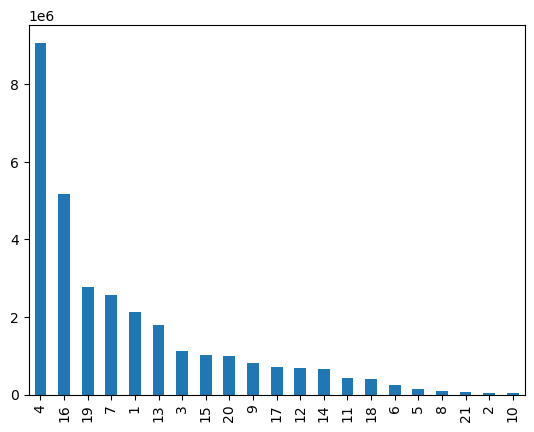

In [90]:
# Create bar chart for 'department_id'
department_bar = df_high_activity['department_id'].value_counts().plot.bar()

#### Oberservations: Produce (4) and Dairy/Eggs (16) have highest frequency of product orders.

In [91]:
# Calculate mean for 'days_since_prior_order' grouped by 'loyalty_flag'
df_high_activity.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean']})

,days_since_prior_order
,mean
loyalty_flag,
Loyal Customer,6.026656
New Customer,17.598691
Regular Customer,12.155135


#### Observations: Loyal Customers order every 6, but New Customers only order every 18 days.

In [92]:
# Create crosstab between 'orders_day_of_week' and 'region' variables
region_orders_day = pd.crosstab(df_high_activity['orders_day_of_week'], df_high_activity['region'], dropna = False)

In [93]:
# Copy to clipboard to create chart in Excel
region_orders_day.to_clipboard()

In [94]:
# Create crosstab between 'income-range' and 'region' variables
income_range_region = pd.crosstab(df_high_activity['income_range'], df_high_activity['region'], dropna = False)

In [95]:
# Copy to clipboard to create chart in Excel
income_range_region.to_clipboard()

In [96]:
# Create crosstab between 'department_id' and 'region' variables
region_department_id = pd.crosstab(df_high_activity['department_id'], df_high_activity['region'], dropna = False)

In [97]:
# Copy to clipboard to create chart in Excel
region_department_id.to_clipboard()

In [98]:
# Create crosstab between 'child_status' and 'region' variables
child_status_region = pd.crosstab(df_high_activity['child_status'], df_high_activity['region'], dropna = False)

In [99]:
# Copy to clipboard to create chart in Excel
child_status_region.to_clipboard()

In [100]:
# Calculate revenue by 'region'
region_prices = df_high_activity.groupby('region')['prices'].sum()

In [101]:
# Copy to clipboard to create chart in Excel
region_prices.to_clipboard()

In [109]:
# Calculate 'days_since_prior_order' mean by 'profile'
df_high_activity.groupby('profile').agg({'days_since_prior_order': ['mean']})

,days_since_prior_order
,mean
profile,
MA_HI_C,10.707262
MA_HI_NC,10.523352
MA_LI_C,11.188045
MA_LI_NC,11.216042
MA_MI_C,10.760579
MA_MI_NC,10.820841
OA_HI_C,10.736970
OA_HI_NC,10.630443


#### Observations: There is not a significant difference among profiles for ordering frequency.

In [106]:
# Calculate revenue by 'profile'
profile_revenue = df_high_activity.groupby('profile')['prices'].sum()

In [108]:
# Copy to clipboard to create chart in Excel
profile_revenue.to_clipboard()

In [110]:
# View frequency for 'loyalty_flag'
df_high_activity['loyalty_flag'].value_counts(dropna = False)

Regular Customer    15876776
Loyal Customer      10284093
New Customer         4803695
Name: loyalty_flag, dtype: int64

# 12. Export Dataframe and Visualizations

In [102]:
# Export department bar chart
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))

In [111]:
# Export profile bar chart
hist_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_bar.png'))

In [ ]:
# Export df_high_activity as high_activity.pkl
df_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity.pkl'))